In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("results_2_11_log.csv")

In [3]:
df.shape

(300, 12)

In [4]:
datasets = df["dataset"].unique()

In [5]:
df["time"] = df['time'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1])*60 + float(x[2]))

In [6]:
for _set in datasets:
    print("Summary Statistics for ", _set)
    print(df.loc[df["dataset"]==_set].describe())
    print("-"*70)

Summary Statistics for  Easy
            Seed        time   train_f1     val_f1        acc    val_acc  \
count  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000   
mean    8.032258   13.067846   0.653919   0.637771   0.765875   0.752524   
std     5.124572   16.577034   0.168000   0.177327   0.111183   0.105288   
min     0.000000    2.589088   0.000000   0.000000   0.087870   0.053435   
25%     3.000000    7.078107   0.612941   0.660550   0.744747   0.756679   
50%     9.000000   10.727873   0.739268   0.677785   0.818052   0.778626   
75%    12.000000   14.115319   0.759323   0.708710   0.828080   0.793893   
max    15.000000  136.009925   0.775062   0.784036   0.837631   0.835878   

         bin_acc  val_bin_acc  train_loss   val_loss  
count  62.000000    62.000000   62.000000  62.000000  
mean    0.765875     0.765875    0.956042   1.038367  
std     0.111183     0.111183    1.302081   1.282746  
min     0.087870     0.087870    0.376359   0.401915  
25%     0.7

In [7]:
df.head()

,Seed,Algorithm,dataset,time,train_f1,val_f1,acc,val_acc,bin_acc,val_bin_acc,train_loss,val_loss
0,0,Shallow,Easy,2.589088,0.672961,0.686557,0.766953,0.778626,0.766953,0.766953,0.516725,0.490077
1,0,Deep,Easy,4.986363,0.534386,0.674146,0.657116,0.702290,0.657116,0.657116,3.686559,3.108525
2,0,LSTM,Easy,6.519046,0.767138,0.695647,0.821394,0.755725,0.821394,0.821394,0.462649,0.575994
3,0,RNN,Easy,3.603714,0.770872,0.701603,0.834766,0.786260,0.834766,0.834766,0.408273,0.435758
4,0,CNN,Easy,10.185778,0.745907,0.726175,0.823305,0.790076,0.823305,0.823305,0.389568,0.464243


In [10]:
easy = df.loc[df["dataset"]=="Easy"]

In [11]:
easy

,Seed,Algorithm,dataset,time,train_f1,val_f1,acc,val_acc,bin_acc,val_bin_acc,train_loss,val_loss
0,0,Shallow,Easy,2.589088,0.672961,0.686557,0.766953,0.778626,0.766953,0.766953,0.516725,0.490077
1,0,Deep,Easy,4.986363,0.534386,0.674146,0.657116,0.702290,0.657116,0.657116,3.686559,3.108525
2,0,LSTM,Easy,6.519046,0.767138,0.695647,0.821394,0.755725,0.821394,0.821394,0.462649,0.575994
3,0,RNN,Easy,3.603714,0.770872,0.701603,0.834766,0.786260,0.834766,0.834766,0.408273,0.435758
4,0,CNN,Easy,10.185778,0.745907,0.726175,0.823305,0.790076,0.823305,0.823305,0.389568,0.464243
25,1,Shallow,Easy,5.251021,0.603723,0.640970,0.723018,0.778626,0.723018,0.723018,0.547755,0.503798
26,1,Deep,Easy,8.348547,0.452750,0.000000,0.638013,0.675573,0.638013,0.638013,2.206370,2.490326
27,1,LSTM,Easy,10.322261,0.766800,0.679505,0.815664,0.790076,0.815664,0.815664,0.426618,0.494360
28,1,RNN,Easy,6.759073,0.745115,0.704136,0.818529,0.824427,0.818529,0.818529,0.407599,0.426374
29,1,CNN,Easy,13.411241,0.759367,0.660775,0.826170,0.820611,0.826170,0.826170,0.400811,0.435303


In [29]:
df_f = df[["Algorithm", "dataset", "val_f1"]]

In [67]:
print(df_f.pivot_table(index='dataset', columns='Algorithm', values='val_f1', aggfunc=np.mean).to_latex())

\begin{tabular}{lrrrrr}
\toprule
Algorithm &       CNN &      Deep &      LSTM &       RNN &   Shallow \\
dataset    &           &           &           &           &           \\
\midrule
Big        &  0.460144 &  0.240169 &  0.377118 &  0.438432 &  0.312609 \\
Easy       &  0.693796 &  0.487633 &  0.628103 &  0.702920 &  0.684983 \\
Image      &  0.847440 &  0.000000 &  0.204835 &  0.000000 &  0.000000 \\
Text       &  0.437131 &  0.445929 &  0.739144 &  0.630088 &  0.414880 \\
TimeSeries &  0.405236 &  0.000000 &  0.402719 &  0.482693 &  0.037089 \\
\bottomrule
\end{tabular}



In [43]:
df_b_acc = df[["Algorithm", "dataset", "val_bin_acc"]]

In [45]:
df_b_acc.pivot_table(index='dataset', columns='Algorithm', values='val_bin_acc', aggfunc=np.max)

Algorithm,CNN,Deep,LSTM,RNN,Shallow
dataset,,,,,
Big,0.999845,0.998525,0.666244,0.999554,0.998942
Easy,0.837631,0.799427,0.835721,0.836676,0.767908
Image,0.951667,0.780000,0.778333,0.778333,0.778333
Text,0.523580,0.505493,0.784700,0.997856,0.507235
TimeSeries,0.878639,0.808054,0.842812,0.858934,0.838479


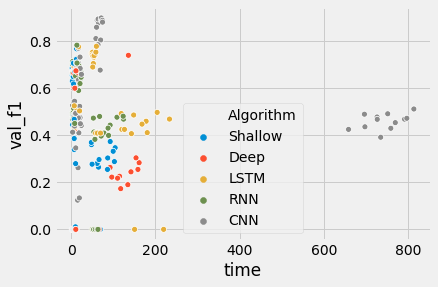

In [49]:
# plot: scatterplot: time vs. f1-score, hue: algorithm
import matplotlib.style as style
style.use('fivethirtyeight')
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df)

In [60]:
df["dataset"].unique()

array(['Easy', 'Big', 'Text', 'Image', 'TimeSeries'], dtype=object)

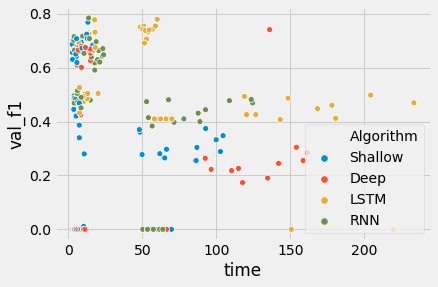

In [55]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["Algorithm"] != "CNN",:])

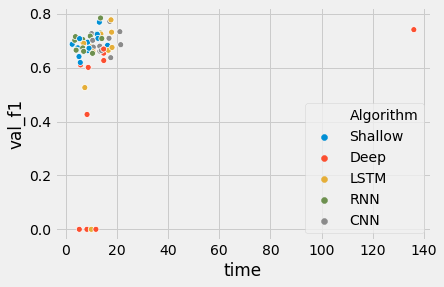

In [61]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["dataset"] == "Easy",:])

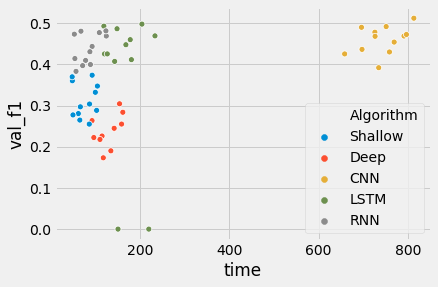

In [81]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["dataset"] == "Big",:])

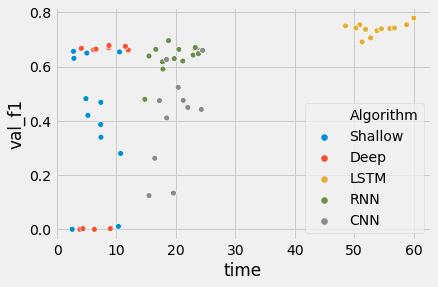

In [83]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["dataset"] == "Text",:])

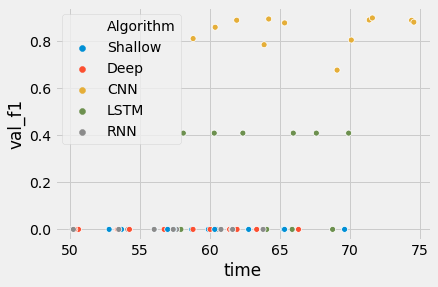

In [64]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["dataset"] == "Image",:])

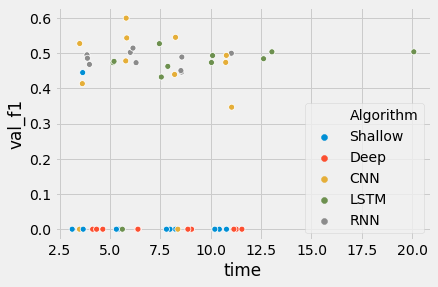

In [65]:
sns.scatterplot(x="time",y="val_f1",hue="Algorithm", data=df.loc[df["dataset"] == "TimeSeries",:])

In [47]:
df.head()

,Seed,Algorithm,dataset,time,train_f1,val_f1,acc,val_acc,bin_acc,val_bin_acc,train_loss,val_loss
0,0,Shallow,Easy,2.589088,0.672961,0.686557,0.766953,0.778626,0.766953,0.766953,0.516725,0.490077
1,0,Deep,Easy,4.986363,0.534386,0.674146,0.657116,0.702290,0.657116,0.657116,3.686559,3.108525
2,0,LSTM,Easy,6.519046,0.767138,0.695647,0.821394,0.755725,0.821394,0.821394,0.462649,0.575994
3,0,RNN,Easy,3.603714,0.770872,0.701603,0.834766,0.786260,0.834766,0.834766,0.408273,0.435758
4,0,CNN,Easy,10.185778,0.745907,0.726175,0.823305,0.790076,0.823305,0.823305,0.389568,0.464243


In [75]:
def get_latex(dataset):
    df_big = df.loc[df["dataset"]==dataset, :]
    df_big = df_big.drop(["Seed", "acc", "val_acc"], axis=1)
    return df_big.groupby(["Algorithm"]).mean().round(3).to_latex()

In [74]:
print(df_big.groupby(["Algorithm"]).mean().round(3).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &     time &  train\_f1 &  val\_f1 &    acc &  val\_acc &  bin\_acc &  val\_bin\_acc &  train\_loss &  val\_loss \\
Algorithm &          &           &         &        &          &          &              &             &           \\
\midrule
CNN       &  743.538 &     0.528 &   0.460 &  1.000 &    0.999 &    1.000 &        1.000 &       0.001 &     0.004 \\
Deep      &  125.933 &     0.187 &   0.240 &  0.996 &    0.999 &    0.996 &        0.996 &       0.070 &     0.017 \\
LSTM      &  166.094 &     0.401 &   0.377 &  0.112 &    0.115 &    0.112 &        0.112 &       0.010 &     0.011 \\
RNN       &   83.906 &     0.453 &   0.438 &  0.999 &    0.999 &    0.999 &        0.999 &       0.003 &     0.003 \\
Shallow   &   76.046 &     0.292 &   0.313 &  0.999 &    0.999 &    0.999 &        0.999 &       0.014 &     0.013 \\
\bottomrule
\end{tabular}



In [ ]:
df_big.pivot_table(index='dataset', columns='Algorithm', values='val_bin_acc', aggfunc=np.max)

In [79]:
print(get_latex("TimeSeries"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &   time &  train\_f1 &  val\_f1 &  bin\_acc &  val\_bin\_acc &  train\_loss &  val\_loss \\
Algorithm &        &           &         &          &              &             &           \\
\midrule
CNN       &  7.118 &     0.464 &   0.405 &    0.751 &        0.751 &       0.813 &     0.862 \\
Deep      &  7.765 &     0.000 &   0.000 &    0.798 &        0.798 &       0.426 &     0.389 \\
LSTM      &  9.573 &     0.376 &   0.403 &    0.832 &        0.832 &       0.853 &     0.867 \\
RNN       &  6.682 &     0.504 &   0.483 &    0.848 &        0.848 &       0.356 &     0.391 \\
Shallow   &  6.839 &     0.032 &   0.037 &    0.801 &        0.801 &       0.569 &     0.562 \\
\bottomrule
\end{tabular}

